In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [ ]:
file_path = '/content/drive/My Drive/Student_Marks.csv'
df = pd.read_csv(file_path)

# take a look at the dataset
df.show()


In [ ]:
cdf = df[['number_courses','time_study','Marks']]
cdf.head(3)

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811


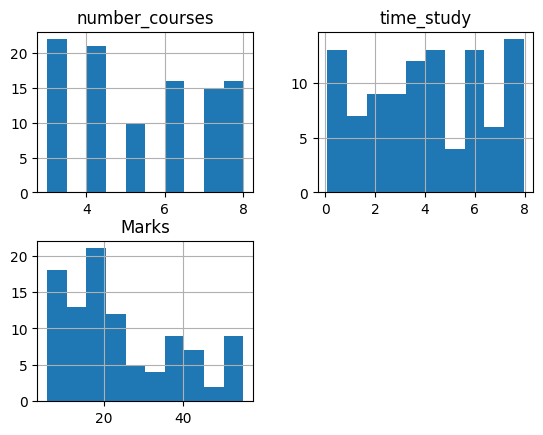

In [ ]:
viz = cdf[['number_courses','time_study','Marks']]
viz.hist()
plt.show()

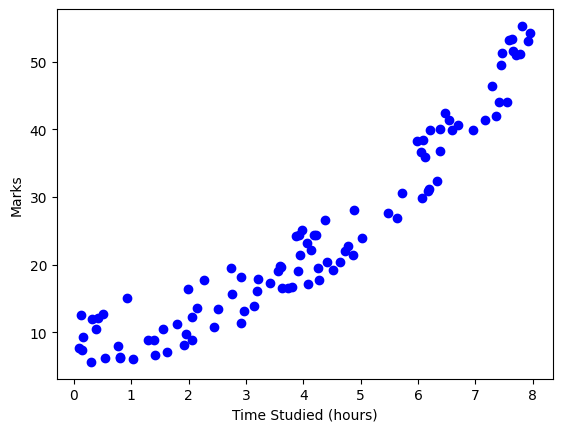

In [ ]:
plt.scatter(cdf.time_study, cdf.Marks, color='blue')
plt.xlabel("Time Studied (hours)")
plt.ylabel("Marks")
plt.show()

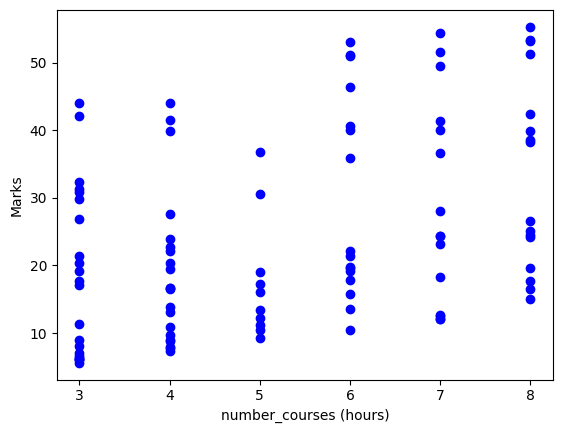

In [ ]:
plt.scatter(cdf.number_courses, cdf.Marks, color='blue')
plt.xlabel("number_courses (hours)")
plt.ylabel("Marks")
plt.show()

**Split data**

In [ ]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

# Scatter plot for training data

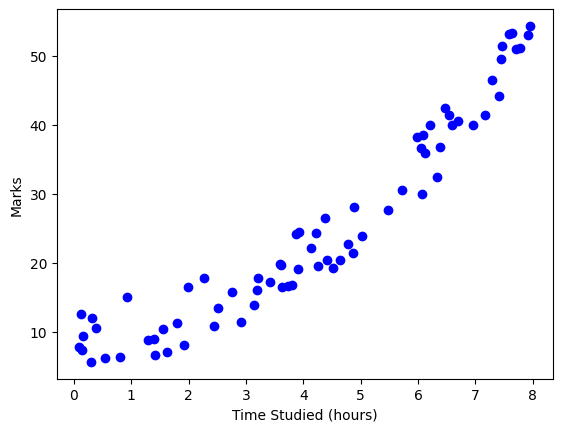

In [ ]:
plt.scatter(train.time_study, train.Marks, color='blue')
plt.xlabel("Time Studied (hours)")
plt.ylabel("Marks")
plt.show()

# Train the linear regression model

In [ ]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
train_x = np.asanyarray(train[['time_study']])
train_y = np.asanyarray(train[['Marks']])
regr.fit(train_x, train_y)

LinearRegression()

In [ ]:
print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficients:  [[5.74790639]]
Intercept:  [1.19792576]


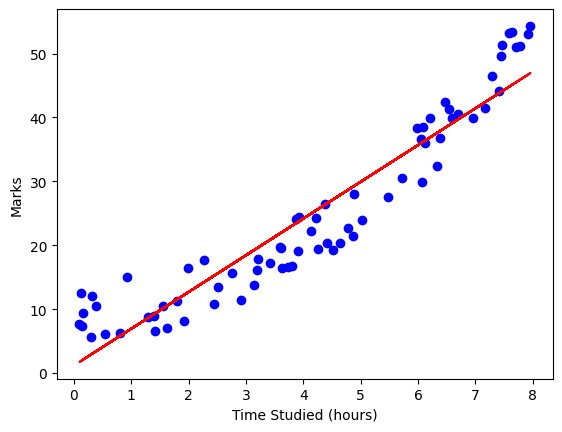

In [ ]:
plt.scatter(train.time_study, train.Marks, color='blue')
plt.plot(train_x, regr.coef_[0][0] * train_x + regr.intercept_[0], '-r')
plt.xlabel("Time Studied (hours)")
plt.ylabel("Marks")
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

test_x = np.asanyarray(test[['time_study']])
test_y = np.asanyarray(test[['Marks']])
test_y_pred = regr.predict(test_x)
mae = mean_absolute_error(test_y, test_y_pred)
mse = mean_squared_error(test_y, test_y_pred)
r2 = r2_score(test_y, test_y_pred)
print("Mean Absolute Error: %.2f" % mae)
print("Mean Squared Error: %.2f" % mse)
print("R2-score: %.2f" % r2)


Mean Absolute Error: 3.74
Mean Squared Error: 22.54
R2-score: 0.87
